In [87]:
import pandas as pd
import numpy as np
data_rfe=pd.read_csv('norm_yanghe.csv')
data_rfe=np.array(data_rfe)
fea=data_rfe[:,:49]
target=data_rfe[:,49]
x_test=fea[:170,:]
y_test=target[:170]
x_train=fea[170:,:]
y_train=target[170:]

# SVM-RFE_RELIEF

In [88]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,alpha,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,self.X_train,self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            #print(relief_score)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            #print(rfe_score)
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            #print(total_score)
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:,candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
    def sele_feature(self,alpha,optim_featur_num):
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        while True:
            relief_score=(reliefF.reliefF(self.X_train[:,candi_fea],self.Y_train)).reshape(1,i)
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            total_score=alpha*relief_score+(1-alpha)*rfe_score
            index_=np.argmin(total_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            if len(candi_fea)==optim_featur_num:
                return candi_fea

In [89]:
rfe_relief_model=rfe_relief_SVM(x_train,y_train,0.22)



In [90]:
aver_mean_lis1,F_measure_lis1=rfe_relief_model.featu_score(0.15,5)
print(aver_mean_lis1,F_measure_lis1)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8116381335142752, 0.8095947074481966, 0.8095960123179706, 0.8095960123179706, 0.8101036066600555, 0.8121483375959079, 0.8070476016493554, 0.8111318440419646, 0.8121509473354559, 0.8126611514170886, 0.8085729944151574, 0.8085729944151574, 0.817760582493867, 0.8157171564277885, 0.817759277624093, 0.8203116029020302, 0.8198013988203977, 0.822357638707657, 0.8228678427892897, 0.8249073542460463, 0.8233780468709224, 0.8233754371313744, 0.8233754371313744, 0.8218435200167024, 0.8182642622266296, 0.8197948744715277, 0.8213254867164256, 0.8213307061955216, 0.8151939036484158, 0.8162156166814553, 0.8121339840283939, 0.8126454929798006, 0.8116237799467614, 0.8100931677018635, 0.8080536562451067, 0.8070293334725195, 0.8095816587504567, 0.809072759538598, 0.8085599457174174, 0.8085573359778694, 0.8085599457174174, 0.8080484367660107, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 0.

In [91]:
aver_mean_lis2,F_measure_lis2=rfe_relief_model.featu_score(0.25,5)
print(aver_mean_lis2,F_measure_lis2)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8116381335142752, 0.8095947074481966, 0.8095960123179706, 0.8095960123179706, 0.8106177253510098, 0.8121483375959079, 0.8070476016493554, 0.8111318440419646, 0.8121509473354559, 0.8126611514170886, 0.8085729944151574, 0.8085729944151574, 0.817760582493867, 0.8157171564277885, 0.817759277624093, 0.8203116029020302, 0.8198013988203977, 0.822357638707657, 0.8228678427892897, 0.8249073542460463, 0.8233780468709224, 0.8233754371313744, 0.8233754371313744, 0.8218435200167024, 0.8182642622266296, 0.8197948744715277, 0.8213254867164256, 0.8213307061955216, 0.8218422151469282, 0.8162143118116812, 0.8136632914035179, 0.8126441881100266, 0.8095829636202307, 0.8116250848165354, 0.8080536562451067, 0.8080549611148807, 0.8095816587504567, 0.809072759538598, 0.8090701497990501, 0.8080484367660109, 0.8116224750769874, 0.8080484367660107, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 0.

In [92]:
aver_mean_lis3,F_measure_lis3=rfe_relief_model.featu_score(0.35,5)
print(aver_mean_lis3,F_measure_lis3)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8106164204812358, 0.8095947074481966, 0.8095960123179706, 0.8095960123179706, 0.8106177253510098, 0.8121483375959079, 0.8070476016493554, 0.8111318440419646, 0.8121509473354559, 0.8090831984967901, 0.8085729944151574, 0.8085729944151574, 0.8141930685317605, 0.8136789498408058, 0.8182707865754997, 0.8152082572159298, 0.820825721592985, 0.8249047445064983, 0.8223498094890129, 0.8249073542460463, 0.8233780468709224, 0.8228665379195157, 0.8203129077718044, 0.8213346208048437, 0.8198000939506237, 0.819289889868991, 0.8187796857873584, 0.8203076882927084, 0.8197961793413017, 0.8172464638029124, 0.816227360509421, 0.8136802547105798, 0.813675035231484, 0.8116355237747273, 0.8085651651965133, 0.8080549611148807, 0.809072759538598, 0.809072759538598, 0.8090701497990501, 0.8080484367660109, 0.8116224750769874, 0.8080484367660107, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 0.78

In [93]:
aver_mean_lis4,F_measure_lis4=rfe_relief_model.featu_score(0.45,5)
print(aver_mean_lis4,F_measure_lis4)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8106164204812358, 0.8095947074481966, 0.8095960123179706, 0.8095960123179706, 0.8106177253510098, 0.8121483375959079, 0.8070476016493554, 0.8111318440419646, 0.8121509473354559, 0.8136841693199018, 0.8136841693199018, 0.8152173913043477, 0.8141930685317605, 0.8162351897280651, 0.8136802547105798, 0.8147019677436192, 0.8152056474763819, 0.820828331332533, 0.8243932355550916, 0.8238869460827809, 0.8233780468709224, 0.8228665379195157, 0.8208244167232112, 0.8213346208048437, 0.8198000939506237, 0.819289889868991, 0.8187796857873584, 0.8203076882927084, 0.8197961793413017, 0.8172464638029124, 0.8192872801294431, 0.8187836003966804, 0.8162247507698732, 0.8116355237747273, 0.8126546270682187, 0.8162286653791953, 0.8111109661255806, 0.8080484367660107, 0.8100905579623154, 0.8080445221566889, 0.8065126050420168, 0.8044704838457122, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 

In [94]:
aver_mean_lis5,F_measure_lis5=rfe_relief_model.featu_score(0.55,5)
print(aver_mean_lis5,F_measure_lis5)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8106164204812358, 0.8095947074481966, 0.8095960123179706, 0.8106203350905579, 0.8136802547105798, 0.8111305391721906, 0.8121496424656819, 0.81215225220523, 0.8121535570750039, 0.8136841693199018, 0.8152173913043477, 0.8162377994676131, 0.8141956782713086, 0.8147058823529413, 0.8141917636619865, 0.8147019677436192, 0.8152056474763819, 0.820828331332533, 0.8243932355550916, 0.8233728273918264, 0.8233780468709224, 0.8254162534579048, 0.8249086591158201, 0.8228678427892897, 0.8249112688553681, 0.8208191972441151, 0.8182668719661779, 0.8198027036901717, 0.8197987890808497, 0.8208178923743411, 0.8218487394957984, 0.8203142126415784, 0.8162247507698732, 0.8116355237747273, 0.8126585416775406, 0.8126585416775406, 0.8131674408893993, 0.8080484367660107, 0.8100905579623154, 0.8080445221566889, 0.8065126050420168, 0.8044704838457122, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 0

In [95]:
aver_mean_lis6,F_measure_lis6=rfe_relief_model.featu_score(0.65,5)
print(aver_mean_lis6,F_measure_lis6)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8106164204812358, 0.8085729944151574, 0.8095960123179706, 0.8116394383840493, 0.8106190302207839, 0.8126611514170886, 0.8136815595803538, 0.8085756041547054, 0.8085808236338012, 0.8101101310089254, 0.8152173913043477, 0.8162377994676131, 0.8141956782713086, 0.8152147815647999, 0.8162338848582913, 0.8157158515580146, 0.820828331332533, 0.820828331332533, 0.8243932355550916, 0.8233728273918264, 0.8233780468709224, 0.8254162534579048, 0.8249086591158201, 0.8254175583276788, 0.8249112688553681, 0.8208191972441151, 0.8182668719661779, 0.8198027036901717, 0.8197987890808497, 0.8208178923743411, 0.8218487394957984, 0.8213372305443917, 0.8162299702489693, 0.8162312751187433, 0.8126572368077666, 0.8126585416775406, 0.8131674408893993, 0.8080484367660107, 0.8105994571741739, 0.8080445221566889, 0.8065126050420168, 0.8044704838457122, 0.8070280286027455, 0.8034566000313168] [0.7884245675080742, 

In [96]:
aver_mean_lis7,F_measure_lis7=rfe_relief_model.featu_score(0.75,5)
print(aver_mean_lis7,F_measure_lis7)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8131674408893993, 0.8085729944151574, 0.8095960123179706, 0.8116394383840493, 0.8106190302207839, 0.8126611514170886, 0.8136815595803538, 0.8085756041547054, 0.8085808236338012, 0.8101101310089254, 0.8152173913043477, 0.8162377994676131, 0.8141956782713086, 0.8152147815647999, 0.8162338848582913, 0.817763192233415, 0.819293804478313, 0.8203155175113525, 0.8233754371313744, 0.8233754371313744, 0.8233728273918262, 0.8223511143587869, 0.8197987890808497, 0.8249047445064981, 0.8243958452946396, 0.8259277624093115, 0.8243971501644136, 0.8259277624093115, 0.8213307061955216, 0.822353724098335, 0.8228678427892897, 0.8187809906571323, 0.813671120622162, 0.813671120622162, 0.8111240148233207, 0.8126585416775406, 0.8111201002139987, 0.8146980531342972, 0.8105994571741739, 0.8080445221566889, 0.8065126050420168, 0.8044704838457122, 0.8039615846338535, 0.8034566000313168] [0.7884245675080742, 0.7

In [97]:
aver_mean_lis8,F_measure_lis8=rfe_relief_model.featu_score(0.85,5)
print(aver_mean_lis8,F_measure_lis8)

[0.7932538232684377, 0.7922308053656245, 0.7896797849574613, 0.8024440210866954, 0.8116381335142752, 0.8090831984967901, 0.8080588757242027, 0.8080614854637507, 0.8090831984967901, 0.8106190302207839, 0.812150947335456, 0.8101101310089254, 0.8116407432538233, 0.8111318440419646, 0.8095960123179706, 0.8121483375959079, 0.8147032726133931, 0.8136841693199018, 0.8136802547105798, 0.8106190302207839, 0.817763192233415, 0.819293804478313, 0.8203155175113525, 0.8177566678845452, 0.8218435200167024, 0.8249060493762723, 0.8254175583276788, 0.8243932355550916, 0.8238843363432329, 0.8233728273918262, 0.8238882509525549, 0.8243971501644136, 0.8259277624093115, 0.8213307061955216, 0.822353724098335, 0.8228678427892897, 0.8187809906571323, 0.8167427840701498, 0.81674278407015, 0.8111240148233207, 0.8126585416775406, 0.8111201002139987, 0.8146980531342972, 0.8105994571741739, 0.8080445221566889, 0.8065126050420168, 0.8044704838457122, 0.8039615846338535, 0.8034566000313168] [0.7884245675080742, 0.78

In [98]:
aver_mean_lis9,F_measure_lis9=rfe_relief_model.featu_score(0.95,5)
print(aver_mean_lis9,F_measure_lis9)

[0.7932538232684377, 0.7947870452528838, 0.7947896549924318, 0.7963215721071037, 0.8034631243801869, 0.8080627903335248, 0.8095973171877446, 0.8085769090244792, 0.8075512813821181, 0.8101036066600553, 0.8126572368077666, 0.8116355237747273, 0.8116368286445013, 0.8111253196930945, 0.8085716895453834, 0.8126572368077666, 0.8116407432538233, 0.8090897228456602, 0.8080667049428467, 0.8111318440419646, 0.8111344537815126, 0.8147084920924893, 0.8126611514170886, 0.8182838352732398, 0.817767106842737, 0.8218578735842161, 0.8167466986794718, 0.8157249856464326, 0.8157249856464326, 0.8029490056892321, 0.8070371626911633, 0.8095881830993266, 0.8172477686726864, 0.8162260556396472, 0.8177553630147711, 0.8177553630147711, 0.813675035231484, 0.8111161856046767, 0.8121378986377159, 0.8121418132470378, 0.8131570019312072, 0.8121352888981679, 0.8080510465055587, 0.8070319432120675, 0.8116211702072134, 0.8054935017485254, 0.8044704838457122, 0.8039615846338535, 0.8034566000313168] [0.7884245675080742, 

In [ ]:
24

In [126]:
np.max(aver_mean_lis1[:35]),np.max(aver_mean_lis2[:35]),np.max(aver_mean_lis3[:35]),np.max(aver_mean_lis4[:35]),np.max(aver_mean_lis5[:35]),np.max(aver_mean_lis6[:35]),np.max(aver_mean_lis7[:35]),np.max(aver_mean_lis8[:35]),np.max(aver_mean_lis9[:35])

(0.8249073542460463,
 0.8249073542460463,
 0.8249073542460463,
 0.8243932355550916,
 0.8254162534579048,
 0.8254175583276788,
 0.8259277624093115,
 0.8259277624093115,
 0.8218578735842161)

In [127]:
np.argmax(aver_mean_lis8[:35])

32

# SVM-RFE

In [99]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class rfe_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        i=featu_num
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        aver=mean(cross_val_score(estimator,x_train,y_train,scoring="accuracy",cv=kf,n_jobs=-1))
        aver_lis[i-1]=aver
        F1=mean(cross_val_score(estimator,x_train,y_train,scoring="f1",cv=kf,n_jobs=-1))
        F_lis[i-1]=F1
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            i-=1
            aver=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,x_train[:,candi_fea],y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i-1]=aver
            F_lis[i-1]=F1
            if i==1:
                break
        return aver_lis,F_lis
   
    def featu_subset(self,featur_num):
        kf=KFold(n_splits=5,shuffle=False)
        estimator=SVC(kernel='linear',C=self.C)
        rank_=[]
        featu_num=self.X_train.shape[1]
        candi_fea=[i for i in range(featu_num)]
        while True:
            estimator.fit(self.X_train[:,candi_fea],self.Y_train)
            rfe_score=(estimator.coef_)**2
            index_=np.argmin(rfe_score)
            remove_fea=candi_fea[index_]
            candi_fea.remove(remove_fea)
            if len(candi_fea)==featur_num:
                break
        return candi_fea

In [100]:
rfe_SVM_model=rfe_SVM(x_train,y_train,0.22)
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis=rfe_SVM_model.featu_score(5)

In [101]:
rfe_SVM_aver_mean_lis,rfe_SVM_F_measure_lis

([0.7932538232684377,
  0.7922308053656245,
  0.7896797849574613,
  0.8024440210866954,
  0.8116381335142752,
  0.8116381335142752,
  0.8095947074481966,
  0.8095960123179706,
  0.8095960123179706,
  0.8101036066600555,
  0.8121483375959079,
  0.8070476016493554,
  0.8111318440419646,
  0.8121509473354559,
  0.8126611514170886,
  0.8085729944151574,
  0.8085729944151574,
  0.817760582493867,
  0.8157171564277885,
  0.817759277624093,
  0.8187796857873584,
  0.8208231118534369,
  0.8238908606921029,
  0.8218448248864764,
  0.8274583746542096,
  0.8213294013257476,
  0.8223550289681091,
  0.822352419228561,
  0.8223524192285611,
  0.8254175583276788,
  0.8197974842110758,
  0.81519520851819,
  0.8187705516989403,
  0.8157041077300484,
  0.8131530873218853,
  0.8111109661255806,
  0.8111083563860326,
  0.8121326791586199,
  0.8116185604676653,
  0.8100892530925414,
  0.8090701497990501,
  0.8100957774414113,
  0.8100931677018635,
  0.809071454668824,
  0.8090701497990501,
  0.808559945717

# SVM-RELIEF

In [102]:
from skfeature.function.similarity_based import reliefF
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from numpy import mean 
from sklearn.model_selection import cross_val_score
class relief_SVM:
    def __init__(self,x_train,y_train,C):
        self.X_train=x_train
        self.Y_train=y_train
        self.C=C
    def featu_score(self,folds):
        kf=KFold(n_splits=folds,shuffle=False)
        featu_num=self.X_train.shape[1]
        relief_fea_score=reliefF.reliefF(self.X_train,self.Y_train)
        relief_candi_fea=list(reliefF.feature_ranking(relief_fea_score))
        aver_lis=[i for i in range(featu_num)]
        F_lis=[i for i in range(featu_num)]
        for i in range(featu_num):
            estimator=SVC(kernel='linear',C=self.C)
            candi_fea=relief_candi_fea[:(i+1)]
            aver=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="accuracy",cv=kf,n_jobs=-1))
            F1=mean(cross_val_score(estimator,self.X_train[:, candi_fea],self.Y_train,scoring="f1",cv=kf,n_jobs=-1))
            aver_lis[i]=aver
            F_lis[i]=F1 
        return aver_lis,F_lis

In [103]:
relief_SVM_model=relief_SVM(x_train,y_train,0.22)
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis=relief_SVM_model.featu_score(5)

In [104]:
relief_SVM_aver_mean_lis,relief_SVM_F_measure_lis

([0.7932538232684377,
  0.7947870452528838,
  0.8014249177932042,
  0.8024453259564694,
  0.8034618195104128,
  0.8029516154287804,
  0.8029529202985541,
  0.8034631243801869,
  0.8019325121352889,
  0.7998890860692103,
  0.8009121039720236,
  0.7993827965968997,
  0.7998930006785323,
  0.798873897385041,
  0.7937627224802966,
  0.7998851714598884,
  0.8003966804112949,
  0.8009042747533796,
  0.8029581397776504,
  0.8044939715016441,
  0.798879116864137,
  0.8009173234511195,
  0.8029555300381022,
  0.8065269586095308,
  0.8090818936270161,
  0.8060206691372201,
  0.8060206691372201,
  0.8095986220575189,
  0.8065373975677227,
  0.80602719348609,
  0.8070502113889034,
  0.8080706195521687,
  0.8014196983141082,
  0.8044926666318701,
  0.8034735633383787,
  0.8070449919098074,
  0.8065334829584007,
  0.8065400073072707,
  0.7998916958087582,
  0.7998930006785324,
  0.7998930006785324,
  0.7993814917271257,
  0.7947779111644657,
  0.7922229761469806,
  0.8060037058301581,
  0.8044691789

D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25240 (\N{CJK UNIFIED IDEOGRAPH-6298}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\2\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UN

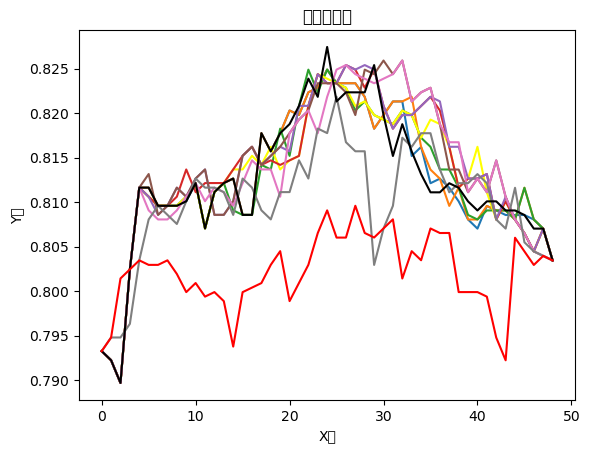

In [105]:
import matplotlib.pyplot as plt

fea_num=[i for i in range(49)]

# 创建图形
plt.plot(fea_num, aver_mean_lis1)
plt.plot(fea_num, aver_mean_lis2)
plt.plot(fea_num, aver_mean_lis3)
plt.plot(fea_num, aver_mean_lis4,color="yellow")
plt.plot(fea_num, aver_mean_lis5)
plt.plot(fea_num, aver_mean_lis6)
plt.plot(fea_num, aver_mean_lis7)
plt.plot(fea_num, aver_mean_lis8)
plt.plot(fea_num, aver_mean_lis9)
plt.plot(fea_num, rfe_SVM_aver_mean_lis,color="black")
plt.plot(fea_num, relief_SVM_aver_mean_lis,color="red")



# 添加标题和标签
plt.title('简单折线图')
plt.xlabel('X轴')
plt.ylabel('Y轴')

# 显示图形
plt.show()

In [106]:
yanghe_accuracy=[]
yanghe_accuracy.append(aver_mean_lis1)
yanghe_accuracy.append(aver_mean_lis2)
yanghe_accuracy.append(aver_mean_lis3)
yanghe_accuracy.append(aver_mean_lis4)
yanghe_accuracy.append(aver_mean_lis5)
yanghe_accuracy.append(aver_mean_lis6)
yanghe_accuracy.append(aver_mean_lis7)
yanghe_accuracy.append(aver_mean_lis8)
yanghe_accuracy.append(aver_mean_lis9)
yanghe_accuracy.append(rfe_SVM_aver_mean_lis)
yanghe_accuracy.append(relief_SVM_aver_mean_lis)

In [107]:
colu=[i for i in range(1,50)]
yanghe_acurracy_dataframe=pd.DataFrame(columns=colu,data=np.array(yanghe_accuracy))
yanghe_acurracy_dataframe.to_csv("yanghe_accuracy.csv")

In [108]:
yanghe_F_measure=[]
yanghe_F_measure.append(F_measure_lis1)
yanghe_F_measure.append(F_measure_lis2)
yanghe_F_measure.append(F_measure_lis3)
yanghe_F_measure.append(F_measure_lis4)
yanghe_F_measure.append(F_measure_lis5)
yanghe_F_measure.append(F_measure_lis6)
yanghe_F_measure.append(F_measure_lis7)
yanghe_F_measure.append(F_measure_lis8)
yanghe_F_measure.append(F_measure_lis9)
yanghe_F_measure.append(rfe_SVM_F_measure_lis)
yanghe_F_measure.append(relief_SVM_F_measure_lis)

In [109]:
colu=[i for i in range(1,50)]
yanghe_F_measure_dataframe=pd.DataFrame(columns=colu,data=np.array(yanghe_F_measure))
yanghe_F_measure_dataframe.to_csv("yanghe_F_measure.csv")